In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Load the experimental and model data
exp_data = np.load('I_q_IPA_exp.npy')
model_data = np.load('I_q_IPA_model.npy')

In [2]:
# Define a function that calculates the difference between the model and experimental data
def obj_func(scale_factor):
    scaled_model_data = np.copy(model_data)
    scaled_model_data[:, 1] *= scale_factor
    f = interp1d(scaled_model_data[:, 0], scaled_model_data[:, 1], kind='linear', bounds_error=False, fill_value=0)
    return np.sum((f(exp_data[:, 0]) - exp_data[:, 1])**2)


In [3]:
# Optimize the scaling factor
res = minimize_scalar(obj_func)

# Scale the model data using the optimal scaling factor
scaled_model_data = np.copy(model_data)
scaled_model_data[:, 1] *= res.x

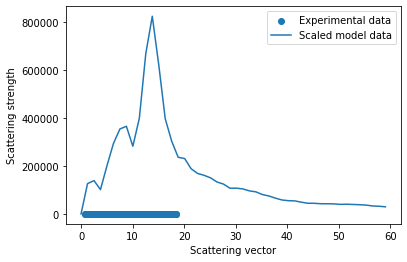

In [4]:
# Plot the experimental and scaled model data
plt.scatter(exp_data[:, 0], exp_data[:, 1], label='Experimental data')
plt.plot(scaled_model_data[:, 0], scaled_model_data[:, 1], label='Scaled model data')
plt.xlabel('Scattering vector')
plt.ylabel('Scattering strength')
plt.legend()
plt.show()

In [5]:
exp_data.shape

(256, 2)